# Ornstein Uhlenbeck process

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import sample 

In [2]:
import OU_tools
from OU_tools import *

## Example 1

### Ornstein-Uhlenbeck forward process

$$
dX_t = -\beta X_t dt + \sigma dW_t, \quad X(0)=X_0, \quad \beta,\sigma >0.
$$
If $X_0\sim N(0, 1)$, then
$$
E[X(t)] = 0, \quad \text{Var}[X(t)] = \sigma_t^2 = e^{-2\beta t} + \frac{\sigma^2}{2\beta}\left(1 - e^{-2\beta t}\right).
$$

* Euler-Maruyama method:
$$
\hat{X}(t_{n+1}) = \hat{X}(t_{n}) - \beta \hat{X}(t_{n}) \Delta t + \sigma\sqrt{\Delta t}Z(t_n), \quad Z(t_i)\sim\mathcal{N}(0, 1).
$$

In [3]:
# parameters of the system
beta = 1.0
sigma = 3.0

# T: Terminal time
T = 0.4

# N: number of trials
N = 1000

# M: number of steps
M = 1000
dt = T/M

# initial condition
mu_0 = 0.0
sigma_0 = 1.0

# At t=T
mean_T = 0.0
mean_inf = 0.0
sigma2_inf = (sigma**2)/(2.0*beta)
sigma_inf = np.sqrt(sigma2_inf)
sigma2_T = np.exp(-2.0*beta*T) + sigma2_inf*(1.0 - np.exp(-2.0*beta*T))
sigma_T = np.sqrt(sigma2_T)

The left panel shows the initial sampling at X(t=0).

The right panel shows the results at X(t=T) and its maximum likelihood estimation (MLE).
MLE:
meam =  0.10029328335752669
std =  1.707995681727279

Theoretical results:
Theoretical meam =  0.0
Theoretical std =  1.710949626841692


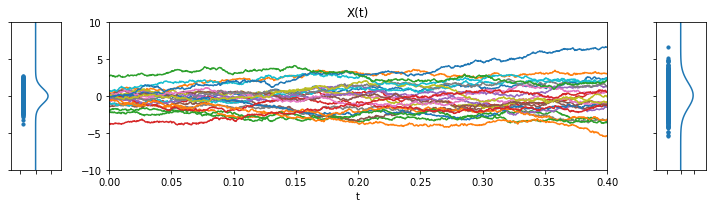

In [4]:
OU_forward(beta, sigma, mu_0, sigma_0, mean_T, sigma_T, T, N, M)

### Ornstein-Uhenbeck reverse process

$$
dX_t = \left(-\beta + \frac{\sigma^2}{\sigma^2_t}\right) X_t dt + \sigma dW_t, \quad X_N\sim \mathcal{N}(0, \sigma_T^2).
$$

Reverse time Euler-Maruyama method:
$$
\hat{X}(t_{n-1}) = \hat{X}(t_{n}) +  \left(-\beta + \frac{\sigma^2}{\sigma^2_t}\right) \hat{X}(t_{n}) (-\Delta t) + \sigma\sqrt{\Delta t}Z(t_n), \quad Z(t_i)\sim\mathcal{N}(0, 1).
$$

In [5]:
print('beta    = ', beta)
print('sigma   = ', sigma)
print('sigma_T = ', sigma_T)
print('T       = ', T)
print('M       = ', M)

beta    =  1.0
sigma   =  3.0
sigma_T =  1.710949626841692
T       =  0.4
M       =  1000


The right panel shows the initial sampling at X(t=T).

The left panel shows the results at X(t=0) and its maximum likelihood estimation (MLE).
MLE:
meam =  -0.008262769626165484
std =  0.9535622012881835

Theoretical results
Theoretical meam =  0.0
Theoretical std =  1.0


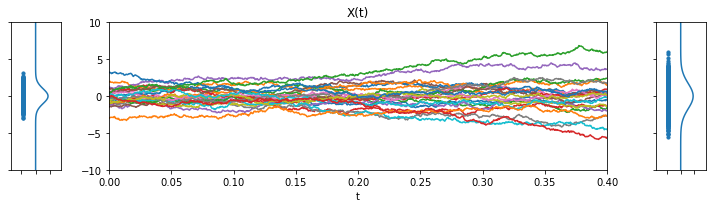

In [6]:
OU_reverse(beta, sigma, mu_0, sigma_0, mean_T, sigma_T, T, N, M)

### Ornstein-Uhenbeck reverse process 2

> Coming back from $\sigma_\inf$.

$$
dX_t = \left(-\beta + \frac{\sigma^2}{\sigma^2_t}\right) X_t dt + \sigma dW_t, \quad X_N\sim \mathcal{N}(0, \sigma^2_{\infty}), \quad \sigma^2_{\infty} =\frac{\sigma^2}{2\beta}.
$$

Reverse time Euler-Maruyama method:
$$
\hat{X}(t_{n-1}) = \hat{X}(t_{n}) +  \left(-\beta + \frac{\sigma^2}{\sigma^2_t}\right) \hat{X}(t_{n}) (-\Delta t) + \sigma\sqrt{\Delta t}Z(t_n), \quad Z(t_i)\sim\mathcal{N}(0, 1).
$$

In [7]:
print('beta    = ', beta)
print('sigma   = ', sigma)
print('sigma_inf = ', sigma_inf)
print('T       = ', T)
print('M       = ', M)

beta    =  1.0
sigma   =  3.0
sigma_inf =  2.1213203435596424
T       =  0.4
M       =  1000


The right panel shows the initial sampling at X(t=T).

The left panel shows the results at X(t=0) and its maximum likelihood estimation (MLE).
MLE:
meam =  -0.002993471180741132
std =  1.0873327411473594

Theoretical results
Theoretical meam =  0.0
Theoretical std =  1.0


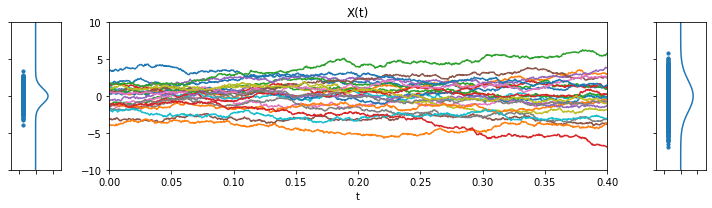

In [8]:
OU_reverse(beta, sigma, mu_0, sigma_0, mean_inf, sigma_inf, T, N, M)

### Backward ODE

$$
dX_t = \left(-\beta + \frac{\sigma^2}{2\sigma^2_t}\right) X_t dt, \quad X_N=X_N.
$$

Reverse time Euler-Maruyama method:
$$
\hat{X}(t_{n-1}) = \hat{X}(t_{n}) +  \left(-\beta + \frac{\sigma^2}{2\sigma^2_t}\right) \hat{X}(t_{n}) (-\Delta t).
$$

In [9]:
print('beta    = ', beta)
print('sigma   = ', sigma)
print('sigma_inf = ', sigma_inf)
print('T       = ', T)
print('M       = ', M)

beta    =  1.0
sigma   =  3.0
sigma_inf =  2.1213203435596424
T       =  0.4
M       =  1000


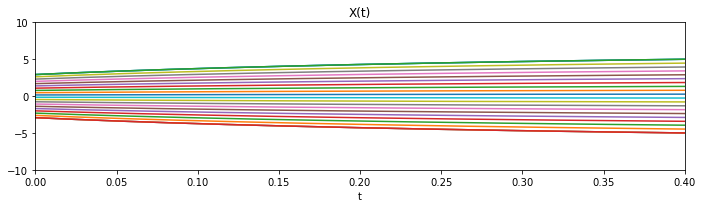

In [10]:
OU_reverse_ODE(beta, sigma, mu_0, sigma_0, mean_inf, sigma_inf, T, N, M)